In [50]:
import numpy as np
import matplotlib.pyplot as plt
T=298 #K
P=101325 #Pa


##water properties
Tc1=647.13 #K
Pc1=220.55 #bar
w1=0.344861

##ethanol properties
Tc2=514 #Tc
Pc2=63.90 #bar
w2=0.643558

R=8.314##j/mol*k
kij=-0.11

def kappa(w):
        return 0.37464+1.54266*w-0.26992*w**2
def alpha(Tr,w):    
    return (1+kappa(w)*(1-np.sqrt(Tr)))**2

def a(T,Tc,Pc,w):
    Tr=T/Tc
    return 0.45724*(R*Tc)**2/Pc*alpha(Tr,w)

def b(Tc,Pc):
    return 0.07780*R*Tc/(Pc)
    

a1=a(T,Tc1,Pc1*10**5,w1)
a2=a(T,Tc2,Pc2*10**5,w2)
b1=b(Tc1,Pc1*10**5)
b2=b(Tc2,Pc2*10**5)

print(a1,a2)
print(b1*10**5,b2*10**5)



0.9849011292292787 2.206916461704518
1.897903333466334 5.202976663536776


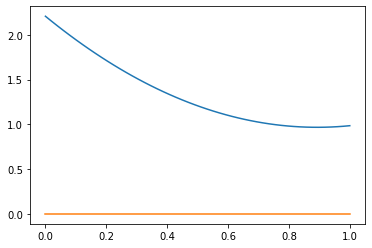

In [51]:
def amix(x1):
    x2=(1-x1)
    return a1*x1**2+a2*x2**2+x1*x2*np.sqrt(a1*a2)*(1-kij)
    
def bmix(x1):
    x2=(1-x1)
    return b1*x1+b2*x2

x1=np.linspace(0,1)
amix_=amix(x1)
bmix_=bmix(x1)

plt.plot(x1,amix_)
plt.plot(x1,bmix_)

Text(0, 0.5, '$\\underbar{V}$ $(cm^3/mol)$')

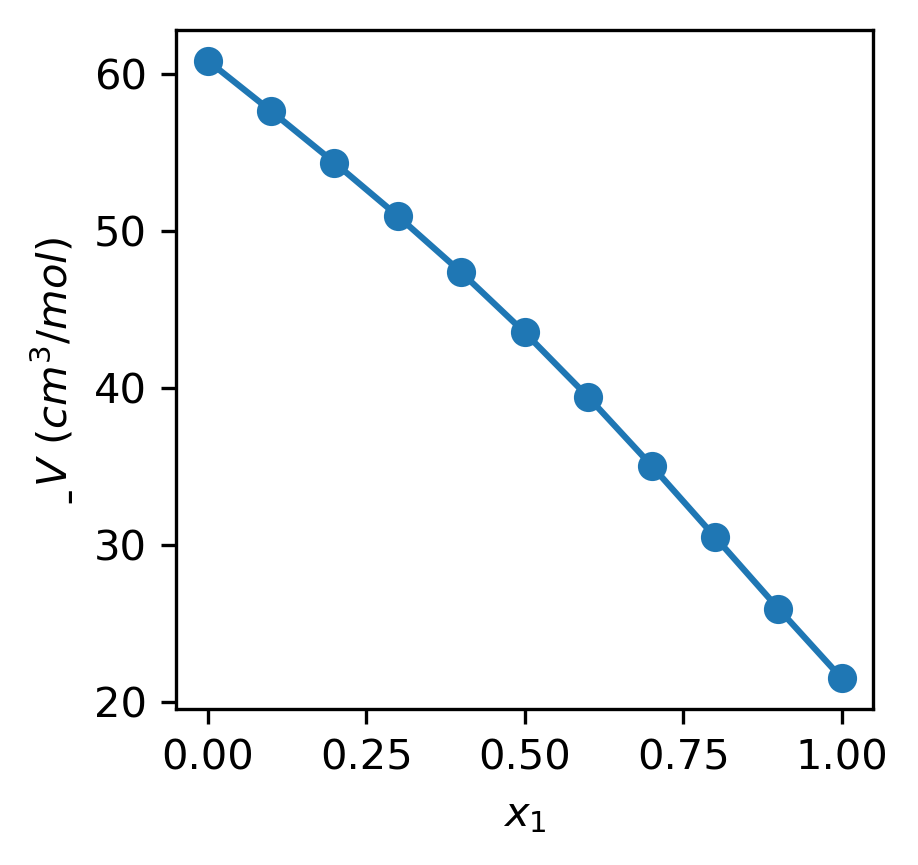

In [52]:
def Zcoeff(T,P,a,b):
    A=a*P/(R*T)**2
    B=b*P/(R*T)
    
    return [1,
            -1+B,
            A-3*B**2-2*B,
            -A*B+B**2+B**3]
plt.figure(dpi=300,figsize=(3,3))
x1_=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.70,0.80,0.90,1]
V_=[]
for x1 in x1_:
    
    roots=np.roots(Zcoeff(T,P,amix(x1),bmix(x1)))
    
    V_.append(np.min(roots[roots>0])*R*298/(1e5))
    
plt.plot(x1_,np.asarray(V_)*10**6,marker='o')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$\underbar{V}$ $(cm^3/mol)$')



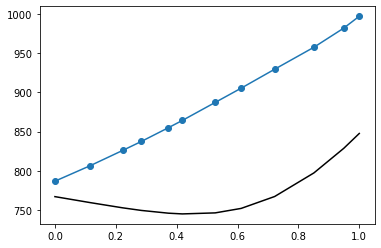

In [53]:
MW1=18 #g/mol
MW2=46.07 #g/mol

x1_exp=np.asarray([0,0.1162,0.2221,0.2841,0.3729,0.4186,0.5266,0.6119,0.7220,0.8509,0.9489,1.0])
rho_exp=np.asarray([786.846,806.655,825.959,837.504,855.031,864.245,887.222,905.376,929.537,957.522,981.906,997.047]) #kg/m^3
rho_mod=[]

for x1 in x1_exp:
    
    x2=1-x1
    MW=x1*MW1+x2*MW2
    roots=np.roots(Zcoeff(T,P,amix(x1),bmix(x1)))
    V=np.min(roots[roots>0])*R*T/(P)
    rho_mod.append(MW/V/10**6)

plt.plot(x1_exp,rho_exp,marker='o')
plt.plot(x1_exp,np.asarray(rho_mod)*1000,'-k')

    

    
    